# Setup and Context

### Introduction

On November 27, 1895, Alfred Nobel signed his last will in Paris. When it was opened after his death, the will caused a lot of controversy, as Nobel had left much of his wealth for the establishment of a prize.

Alfred Nobel dictates that his entire remaining estate should be used to endow “prizes to those who, during the preceding year, have conferred the greatest benefit to humankind”.

Every year the Nobel Prize is given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace.

<img src=https://i.imgur.com/36pCx5Q.jpg>

Let's see what patterns we can find in the data of the past Nobel laureates. What can we learn about the Nobel prize and our world more generally?

### Upgrade plotly (only Google Colab Notebook)


In [ ]:
# %pip install --upgrade plotly

### Import Statements

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

### Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

### Read the Data

In [ ]:
df_data = pd.read_csv('nobel_prize_data.csv')

Caveats: The exact birth dates for Michael Houghton, Venkatraman Ramakrishnan, and Nadia Murad are unknown. I've substituted them with mid-year estimate of July 2nd.


# Data Exploration & Cleaning

Preliminary data exploration.
* What is the shape of `df_data`? How many rows and columns?
* What are the column names?
* In which year was the Nobel prize first awarded?
* Which year is the latest year included in the dataset?
* Are there any duplicate values in the dataset?
* Are there NaN values in the dataset?
* Which columns tend to have NaN values?
* How many NaN values are there per column?
* Why do these columns have NaN values?
* Convert the `birth_date` column to Pandas `Datetime` objects
* Add a Column called `share_pct` which has the laureates' share as a percentage in the form of a floating-point number.

In [ ]:
df_data.head()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE


In [ ]:
print(f"The number of rows and columns are: {df_data.shape}")

The number of rows and columns are: (962, 16)


In [ ]:
print(f"The column names are: {df_data.columns}")

The column names are: Index(['year', 'category', 'prize', 'motivation', 'prize_share',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'birth_country_current', 'sex', 'organization_name',
       'organization_city', 'organization_country', 'ISO'],
      dtype='object')


In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   year                   962 non-null    int64 
 1   category               962 non-null    object
 2   prize                  962 non-null    object
 3   motivation             874 non-null    object
 4   prize_share            962 non-null    object
 5   laureate_type          962 non-null    object
 6   full_name              962 non-null    object
 7   birth_date             934 non-null    object
 8   birth_city             931 non-null    object
 9   birth_country          934 non-null    object
 10  birth_country_current  934 non-null    object
 11  sex                    934 non-null    object
 12  organization_name      707 non-null    object
 13  organization_city      707 non-null    object
 14  organization_country   708 non-null    object
 15  ISO                    

We notice that the columns contain the following information:

`birth_date`: date in string format

`motivation`: description of what the prize is for

`prize_share`: given as a fraction

`laureate_type`: individual or organisation

`birth_country`: has countries that no longer exist

`birth_country_current`: current name of the country where the birth city is located

`ISO`: three-letter international country code

`organization_name`: research institution where the discovery was made

`organization_city`: location of the institution

In [ ]:
print(f'Nobel prize first awarded in year: {df_data["year"].min()}')
print(f'Latest year in dataset is: {df_data["year"].max()}')

Nobel prize first awarded in year: 1901
Latest year in dataset is: 2020


### Check for Duplicates

In [ ]:
duplicates = df_data.duplicated().sum()
print(f'There are {duplicates} duplicates in the dataset.')


There are 0 duplicates in the dataset.


### Check for NaN Values

In [ ]:
df_data.isna().sum()

,0
year,0
category,0
prize,0
motivation,88
prize_share,0
laureate_type,0
full_name,0
birth_date,28
birth_city,31
birth_country,28


Why are there so many NaN values for the birth date? And why are there so many missing values among the organisation columns?


In [ ]:
col_subset = ['year','category', 'laureate_type',
              'birth_date','full_name', 'organization_name']
df_data.loc[df_data.birth_date.isna()][col_subset]

,year,category,laureate_type,birth_date,full_name,organization_name
24,1904,Peace,Organization,NaN,Institut de droit international (Institute of ...,NaN
60,1910,Peace,Organization,NaN,Bureau international permanent de la Paix (Per...,NaN
89,1917,Peace,Organization,NaN,Comité international de la Croix Rouge (Intern...,NaN
200,1938,Peace,Organization,NaN,Office international Nansen pour les Réfugiés ...,NaN
215,1944,Peace,Organization,NaN,Comité international de la Croix Rouge (Intern...,NaN
237,1947,Peace,Organization,NaN,American Friends Service Committee (The Quakers),NaN
238,1947,Peace,Organization,NaN,Friends Service Council (The Quakers),NaN
283,1954,Peace,Organization,NaN,Office of the United Nations High Commissioner...,NaN
348,1963,Peace,Organization,NaN,Comité international de la Croix Rouge (Intern...,NaN
349,1963,Peace,Organization,NaN,Ligue des Sociétés de la Croix-Rouge (League o...,NaN


Filtering on the NaN values in the birth date column we see that we get back a bunch of organisations, like the UN or the Red Cross.

That makes sense. We also see that since the organisation's name is in the full_name column, the organisation_name column contains NaN.

In addition, when we look at for rows where the organization_name column has no value, we also see that many prizes went to people who were not affiliated with a university or research institute. This includes many of the Literature and Peace prize winners.

In [ ]:
col_subset = ['year','category', 'laureate_type',
              'full_name', 'organization_name']
df_data.loc[df_data.organization_name.isna()][col_subset]

,year,category,laureate_type,full_name,organization_name
1,1901,Literature,Individual,Sully Prudhomme,NaN
3,1901,Peace,Individual,Frédéric Passy,NaN
4,1901,Peace,Individual,Jean Henry Dunant,NaN
7,1902,Literature,Individual,Christian Matthias Theodor Mommsen,NaN
9,1902,Peace,Individual,Charles Albert Gobat,NaN
...,...,...,...,...,...
932,2018,Peace,Individual,Nadia Murad,NaN
942,2019,Literature,Individual,Peter Handke,NaN
946,2019,Peace,Individual,Abiy Ahmed Ali,NaN
954,2020,Literature,Individual,Louise Glück,NaN


### Type Conversions


#### Convert Birth Date to Datetime

In [ ]:
df_data.birth_date = pd.to_datetime(df_data.birth_date)

#### Add a Column with the Prize Share as a Percentage

In [ ]:
separated_values = df_data.prize_share.str.split('/', expand=True)
numerator = pd.to_numeric(separated_values[0])
denominator = pd.to_numeric(separated_values[1])
df_data['share_pct'] = numerator / denominator

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   year                   962 non-null    int64         
 1   category               962 non-null    object        
 2   prize                  962 non-null    object        
 3   motivation             874 non-null    object        
 4   prize_share            962 non-null    object        
 5   laureate_type          962 non-null    object        
 6   full_name              962 non-null    object        
 7   birth_date             934 non-null    datetime64[ns]
 8   birth_city             931 non-null    object        
 9   birth_country          934 non-null    object        
 10  birth_country_current  934 non-null    object        
 11  sex                    934 non-null    object        
 12  organization_name      707 non-null    object        
 13  organ

#  Percentage of Male vs. Female Laureates

Show how many prizes went to men compared to how many prizes went to women. What percentage of all the prizes went to women?

In [ ]:
biology = df_data.sex.value_counts()
biology

,count
sex,
Male,876
Female,58


In [ ]:
fig = px.pie(biology,
             labels=biology.index,
             names=biology.index,
             values=biology.values,
             title='Percentage of Male vs Female Winners',
             hole=0.4,
             hover_name=biology.index)

fig.update_traces(textposition='inside', textinfo='percent', textfont_size=15)
fig.show()


# Who were the first 3 Women to Win the Nobel Prize?

* What are the names of the first 3 female Nobel laureates?
* What did the win the prize for?
* What do you see in their `birth_country`? Were they part of an organisation?

In [ ]:
df_data[df_data.sex == 'Female'].sort_values('year').head(3)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
18,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,NaN,NaN,NaN,POL,0.25
29,1905,Peace,The Nobel Peace Prize 1905,NaN,1/1,Individual,"Baroness Bertha Sophie Felicita von Suttner, n...",1843-06-09,Prague,Austrian Empire (Czech Republic),Czech Republic,Female,NaN,NaN,NaN,CZE,1.00
51,1909,Literature,The Nobel Prize in Literature 1909,"""in appreciation of the lofty idealism, vivid ...",1/1,Individual,Selma Ottilia Lovisa Lagerlöf,1858-11-20,Mårbacka,Sweden,Sweden,Female,NaN,NaN,NaN,SWE,1.00


# Find the Repeat Winners

Did some people get a Nobel Prize more than once? If so, who were they?

In [ ]:
more_than_once_winner = df_data[df_data.duplicated(subset=['full_name'], keep=False)]

print(f'There are {more_than_once_winner.full_name.nunique()}' +
      ' winners who were awarded the prize more than once.')
col_subset = ['year','category','laureate_type','full_name']
more_than_once_winner[col_subset]

There are 6 winners who were awarded the prize more than once.


,year,category,laureate_type,full_name
18,1903,Physics,Individual,"Marie Curie, née Sklodowska"
62,1911,Chemistry,Individual,"Marie Curie, née Sklodowska"
89,1917,Peace,Organization,Comité international de la Croix Rouge (Intern...
215,1944,Peace,Organization,Comité international de la Croix Rouge (Intern...
278,1954,Chemistry,Individual,Linus Carl Pauling
283,1954,Peace,Organization,Office of the United Nations High Commissioner...
297,1956,Physics,Individual,John Bardeen
306,1958,Chemistry,Individual,Frederick Sanger
340,1962,Peace,Individual,Linus Carl Pauling
348,1963,Peace,Organization,Comité international de la Croix Rouge (Intern...


We see that Marie Curie actually got the Nobel prize twice - once in physics and once in chemistry. Linus Carl Pauling got it first in chemistry and later for peace given his work in promoting nuclear disarmament. Also, the International Red Cross was awarded the Peace prize a total of 3 times. The first two times were both during the devastating World Wars.

# Number of Prizes per Category

* In how many categories are prizes awarded?
* Calculate number of prizes awarded in each category.
* Which category has the most number of prizes awarded?
* Which category has the fewest number of prizes awarded?
* When was the first prize in the field of Economics awarded?
* Who did the prize go to?

In [ ]:
categories = df_data.category.value_counts()
categories

,count
category,
Medicine,222
Physics,216
Chemistry,186
Peace,135
Literature,117
Economics,86


In [ ]:
v_bar = px.bar(x=categories.index,
               y=categories.values,
               color=categories.values,
               color_continuous_scale='Aggrnyl',
               title='Number of Prizes per Category',
               labels={'x':'Category', 'y':'Number of Prizes'}
               )
v_bar.update_layout(xaxis_title='Nobel Prize Category',
                    yaxis_title='Number of Prizes',
                    coloraxis_showscale=False)
v_bar.show()


In [ ]:
df_data[df_data.category=='Economics'].sort_values('year')

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
393,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,Individual,Jan Tinbergen,1903-04-12,the Hague,Netherlands,Netherlands,Male,The Netherlands School of Economics,Rotterdam,Netherlands,NLD,0.50
394,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,Individual,Ragnar Frisch,1895-03-03,Oslo,Norway,Norway,Male,University of Oslo,Oslo,Norway,NOR,0.50
402,1970,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for the scientific work through which he has ...",1/1,Individual,Paul A. Samuelson,1915-05-15,"Gary, IN",United States of America,United States of America,Male,Massachusetts Institute of Technology (MIT),"Cambridge, MA",United States of America,USA,1.00
411,1971,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for his empirically founded interpretation of...",1/1,Individual,Simon Kuznets,1901-04-30,Pinsk,Russian Empire (Belarus),Belarus,Male,Harvard University,"Cambridge, MA",United States of America,BLR,1.00
419,1972,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for their pioneering contributions to general...",1/2,Individual,John R. Hicks,1904-04-08,Warwick,United Kingdom,United Kingdom,Male,University of Oxford,Oxford,United Kingdom,GBR,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,2019,Economics,The Sveriges Riksbank Prize in Economic Scienc...,“for their experimental approach to alleviatin...,1/3,Individual,Abhijit Banerjee,1961-02-21,Mumbai,India,India,Male,Massachusetts Institute of Technology (MIT),"Cambridge, MA",United States of America,IND,0.33
940,2019,Economics,The Sveriges Riksbank Prize in Economic Scienc...,“for their experimental approach to alleviatin...,1/3,Individual,Esther Duflo,1972-10-25,Paris,France,France,Female,Massachusetts Institute of Technology (MIT),"Cambridge, MA",United States of America,FRA,0.33
941,2019,Economics,The Sveriges Riksbank Prize in Economic Scienc...,“for their experimental approach to alleviatin...,1/3,Individual,Michael Kremer,1964-11-12,"New York, NY",United States of America,United States of America,Male,Harvard University,"Cambridge, MA",United States of America,USA,0.33
952,2020,Economics,The Sveriges Riksbank Prize in Economic Scienc...,“for improvements to auction theory and invent...,1/2,Individual,Paul R. Milgrom,1948-04-20,"Detroit, MI",United States of America,United States of America,Male,Stanford University,"Stanford, CA",United States of America,USA,0.50


The chart above begs the question: "Why are there so few prizes in the field of economics?". Looking at the first couple of winners in the economics category, we have our answer.

The economics prize is much newer. It was first awarded in 1969, compared to 1901 for physics.


# Male and Female Winners by Category
* We already saw that overall, only 6.2% of Nobel prize winners were female. Does this vary by category?

* How many prizes went to women in Literature compared to Physics?


In [ ]:
cat_men_women = df_data.groupby(['category','sex'], as_index=False).agg({'prize':'count'})
cat_men_women.sort_values('prize', ascending=False, inplace=True)
cat_men_women


,category,sex,prize
11,Physics,Male,212
7,Medicine,Male,210
1,Chemistry,Male,179
5,Literature,Male,101
9,Peace,Male,90
3,Economics,Male,84
8,Peace,Female,17
4,Literature,Female,16
6,Medicine,Female,12
0,Chemistry,Female,7


In [ ]:
diff_bar = px.bar(cat_men_women,
                  x='category',
                  y='prize',
                  color='sex',
                  title='Prizes Won by Men vs Women by Category',
                  labels={'prize':'Number of Prizes'},
                  hover_name= 'category'
                  )
diff_bar.update_layout(xaxis_title='Nobel Prize Category',
                       yaxis_title='Number of Prizes'
                       )
diff_bar.show()

We see that overall the imbalance is pretty large with physics, economics, and chemistry. Women are somewhat more represented in categories of Medicine, Literature and Peace.

# Number of Prizes Awarded Over Time

Are more prizes awarded recently than when the prize was first created? Show the trend in awards visually.
* Count the number of prizes awarded every year.
* Looking at the chart, did the first and second world wars have an impact on the number of prizes being given out?
* What could be the reason for the trend in the chart?


In [ ]:
prize_per_year = df_data.year.value_counts().sort_index()
prize_per_year

,count
year,
1901,6
1902,7
1903,7
1904,6
1905,5
...,...
2016,11
2017,12
2018,13


Seeing the chart, we can say that nearly double the prizes are awarded recently.

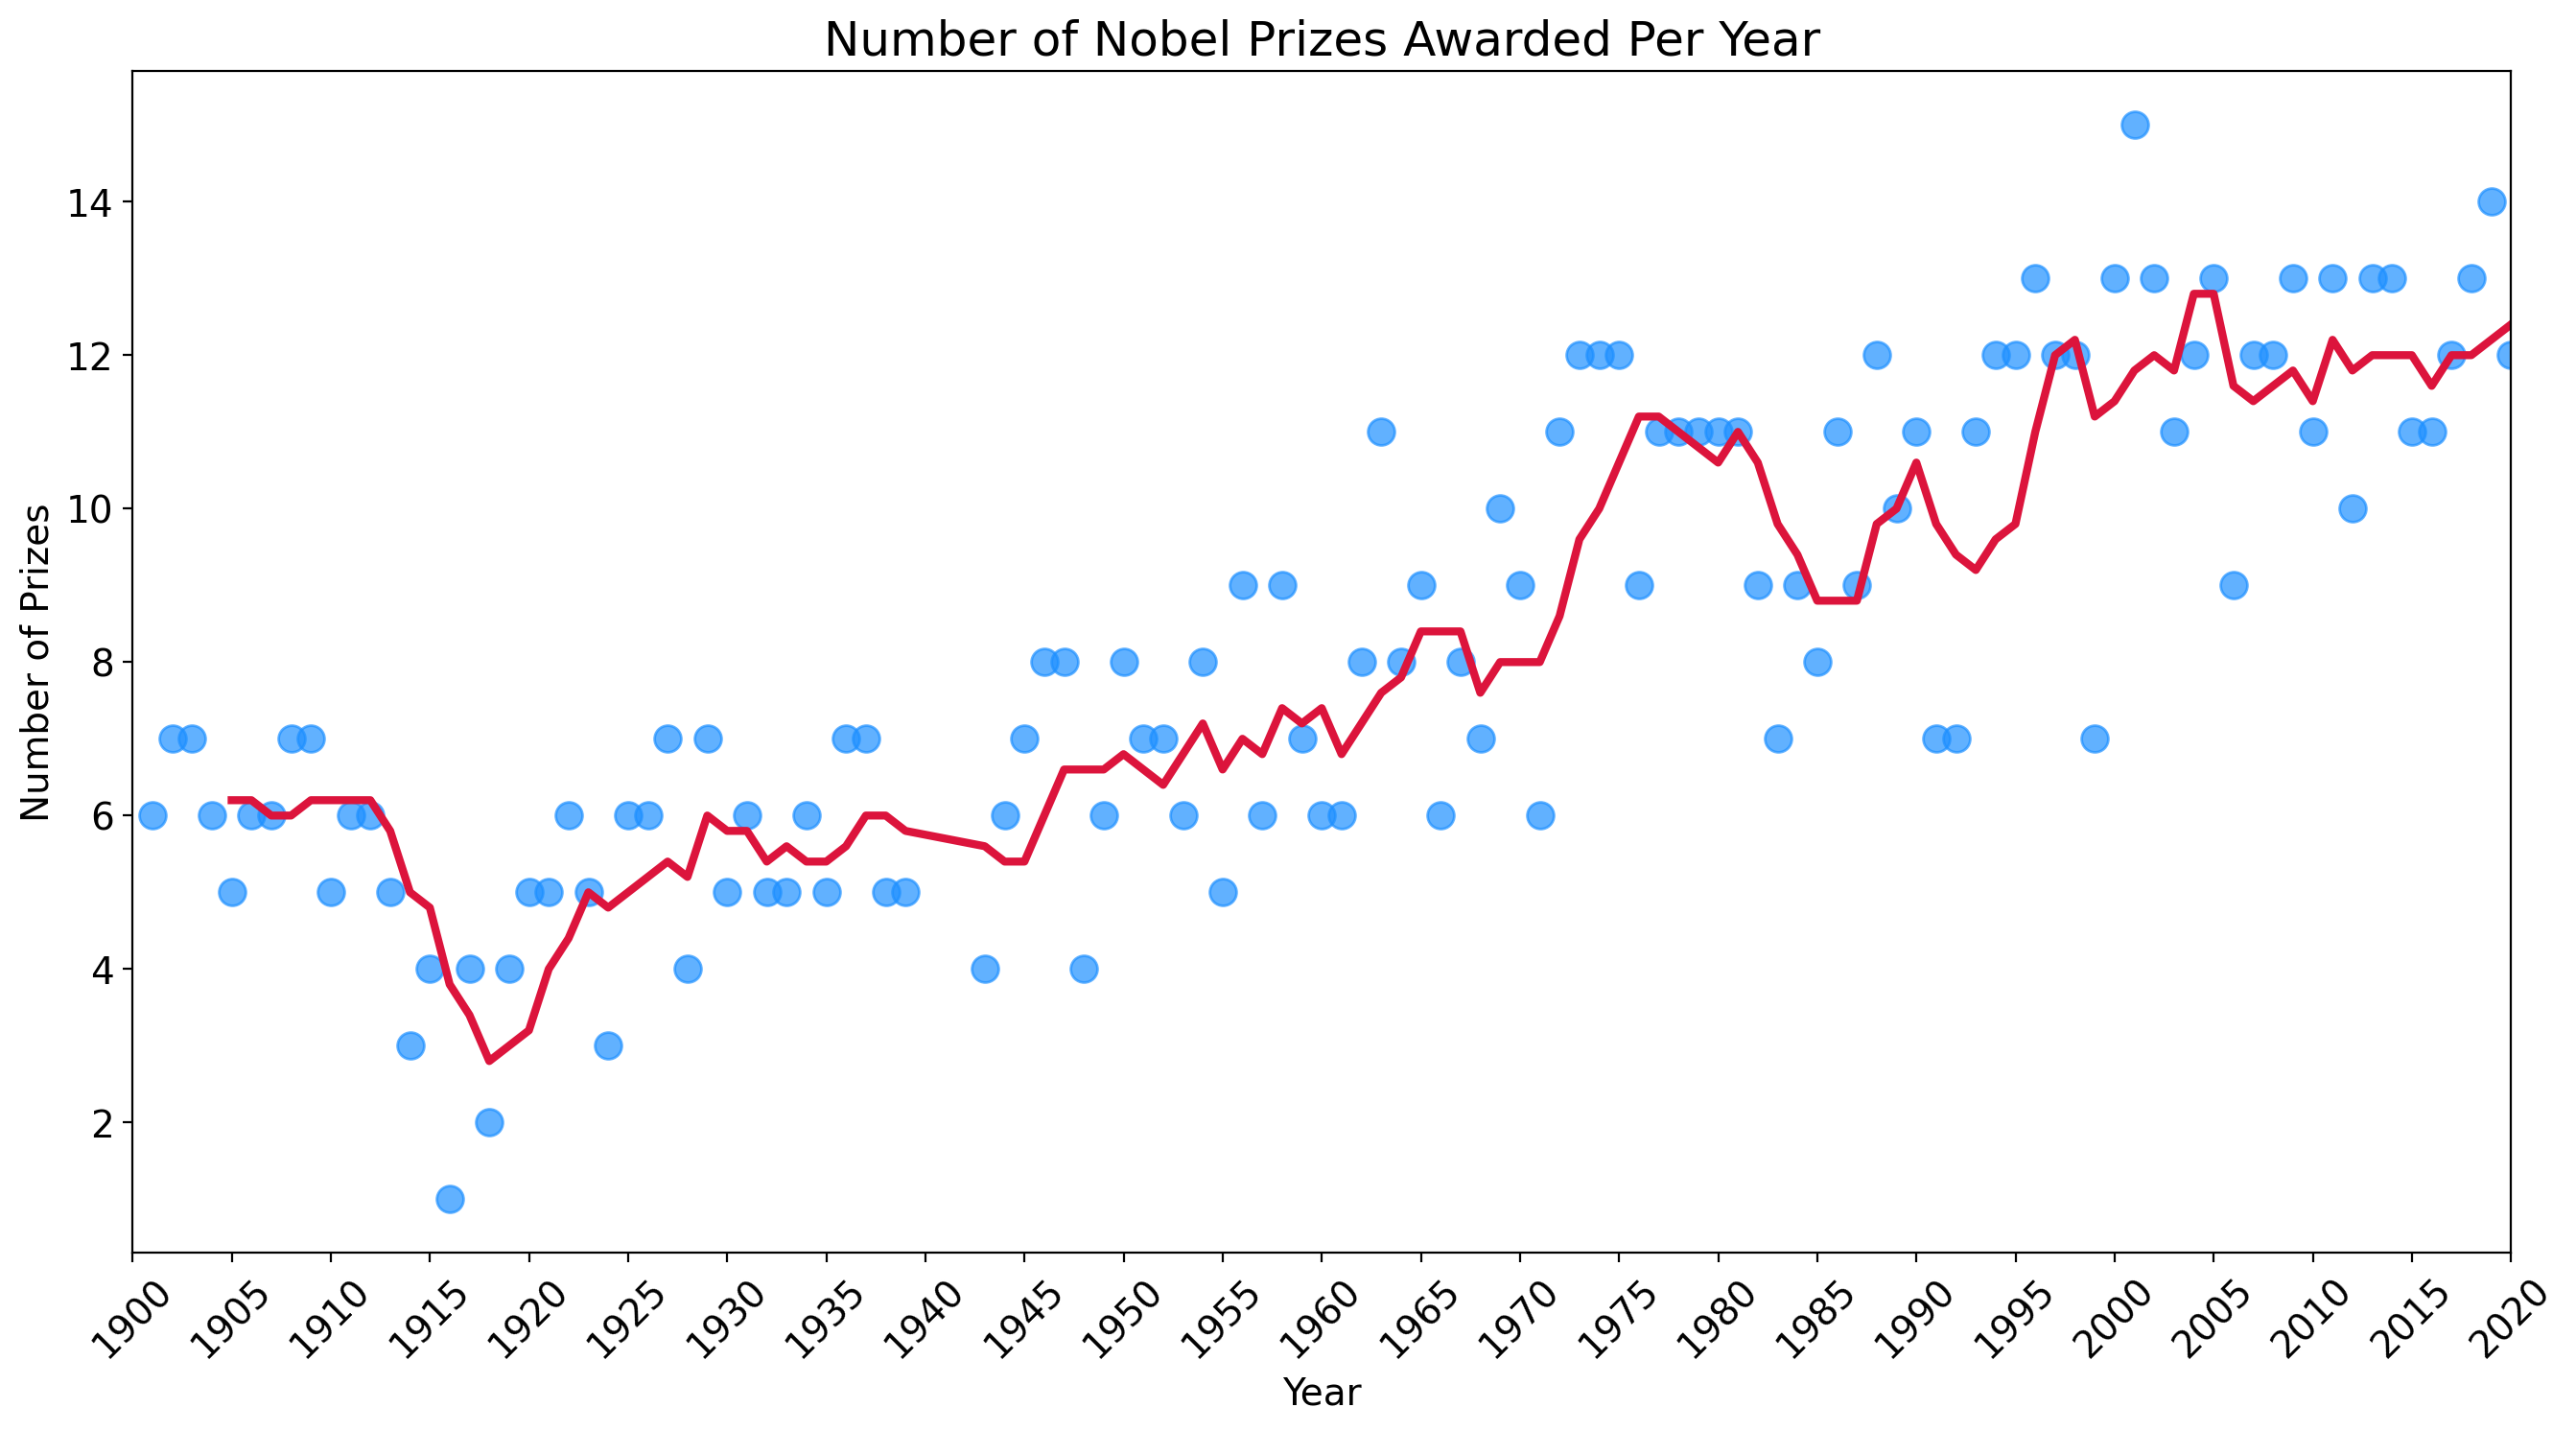

In [ ]:
moving_average = prize_per_year.rolling(window=5).mean()

plt.figure(figsize=(16,8), dpi=200)
plt.title('Number of Nobel Prizes Awarded Per Year', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Prizes', fontsize=14)

ax = plt.gca() # get current axis
ax.set_xlim(1900,2020)

plt.xticks(np.arange(1900,2021,step=5),
           fontsize=14,
           rotation=45)
plt.yticks(fontsize=14)

ax.scatter(x=prize_per_year.index,
            y=prize_per_year.values,
            color='dodgerblue',
            alpha=0.7,
            s=100)

ax.plot(moving_average.index,
         moving_average.values,
         color='crimson',
         linewidth=3)

plt.show()


The chart shows that both World War I (1914-1918) and World War II (1939-1945) significantly impacted the awarding of Nobel Prizes. During these periods, the number of prizes dropped sharply, reflecting global disruptions caused by the wars. Research and academic work were heavily affected as resources and efforts were redirected toward the war. Additionally, international collaboration and communication, crucial for scientific progress, were severely hindered. After the wars, a recovery is evident with the number of prizes gradually increasing, indicating a return to stability and renewed focus on research and innovation.

# Are More Prizes Shared Than Before?


If more prizes are given out, perhaps it is because the prize is split between more people.
If more people get the prize, then the average share should go down, right?

In [ ]:
average_prize_share = df_data.groupby('year').share_pct.mean()
average_prize_share

,share_pct
year,
1901,0.83
1902,0.71
1903,0.71
1904,0.83
1905,1.00
...,...
2016,0.55
2017,0.50
2018,0.46


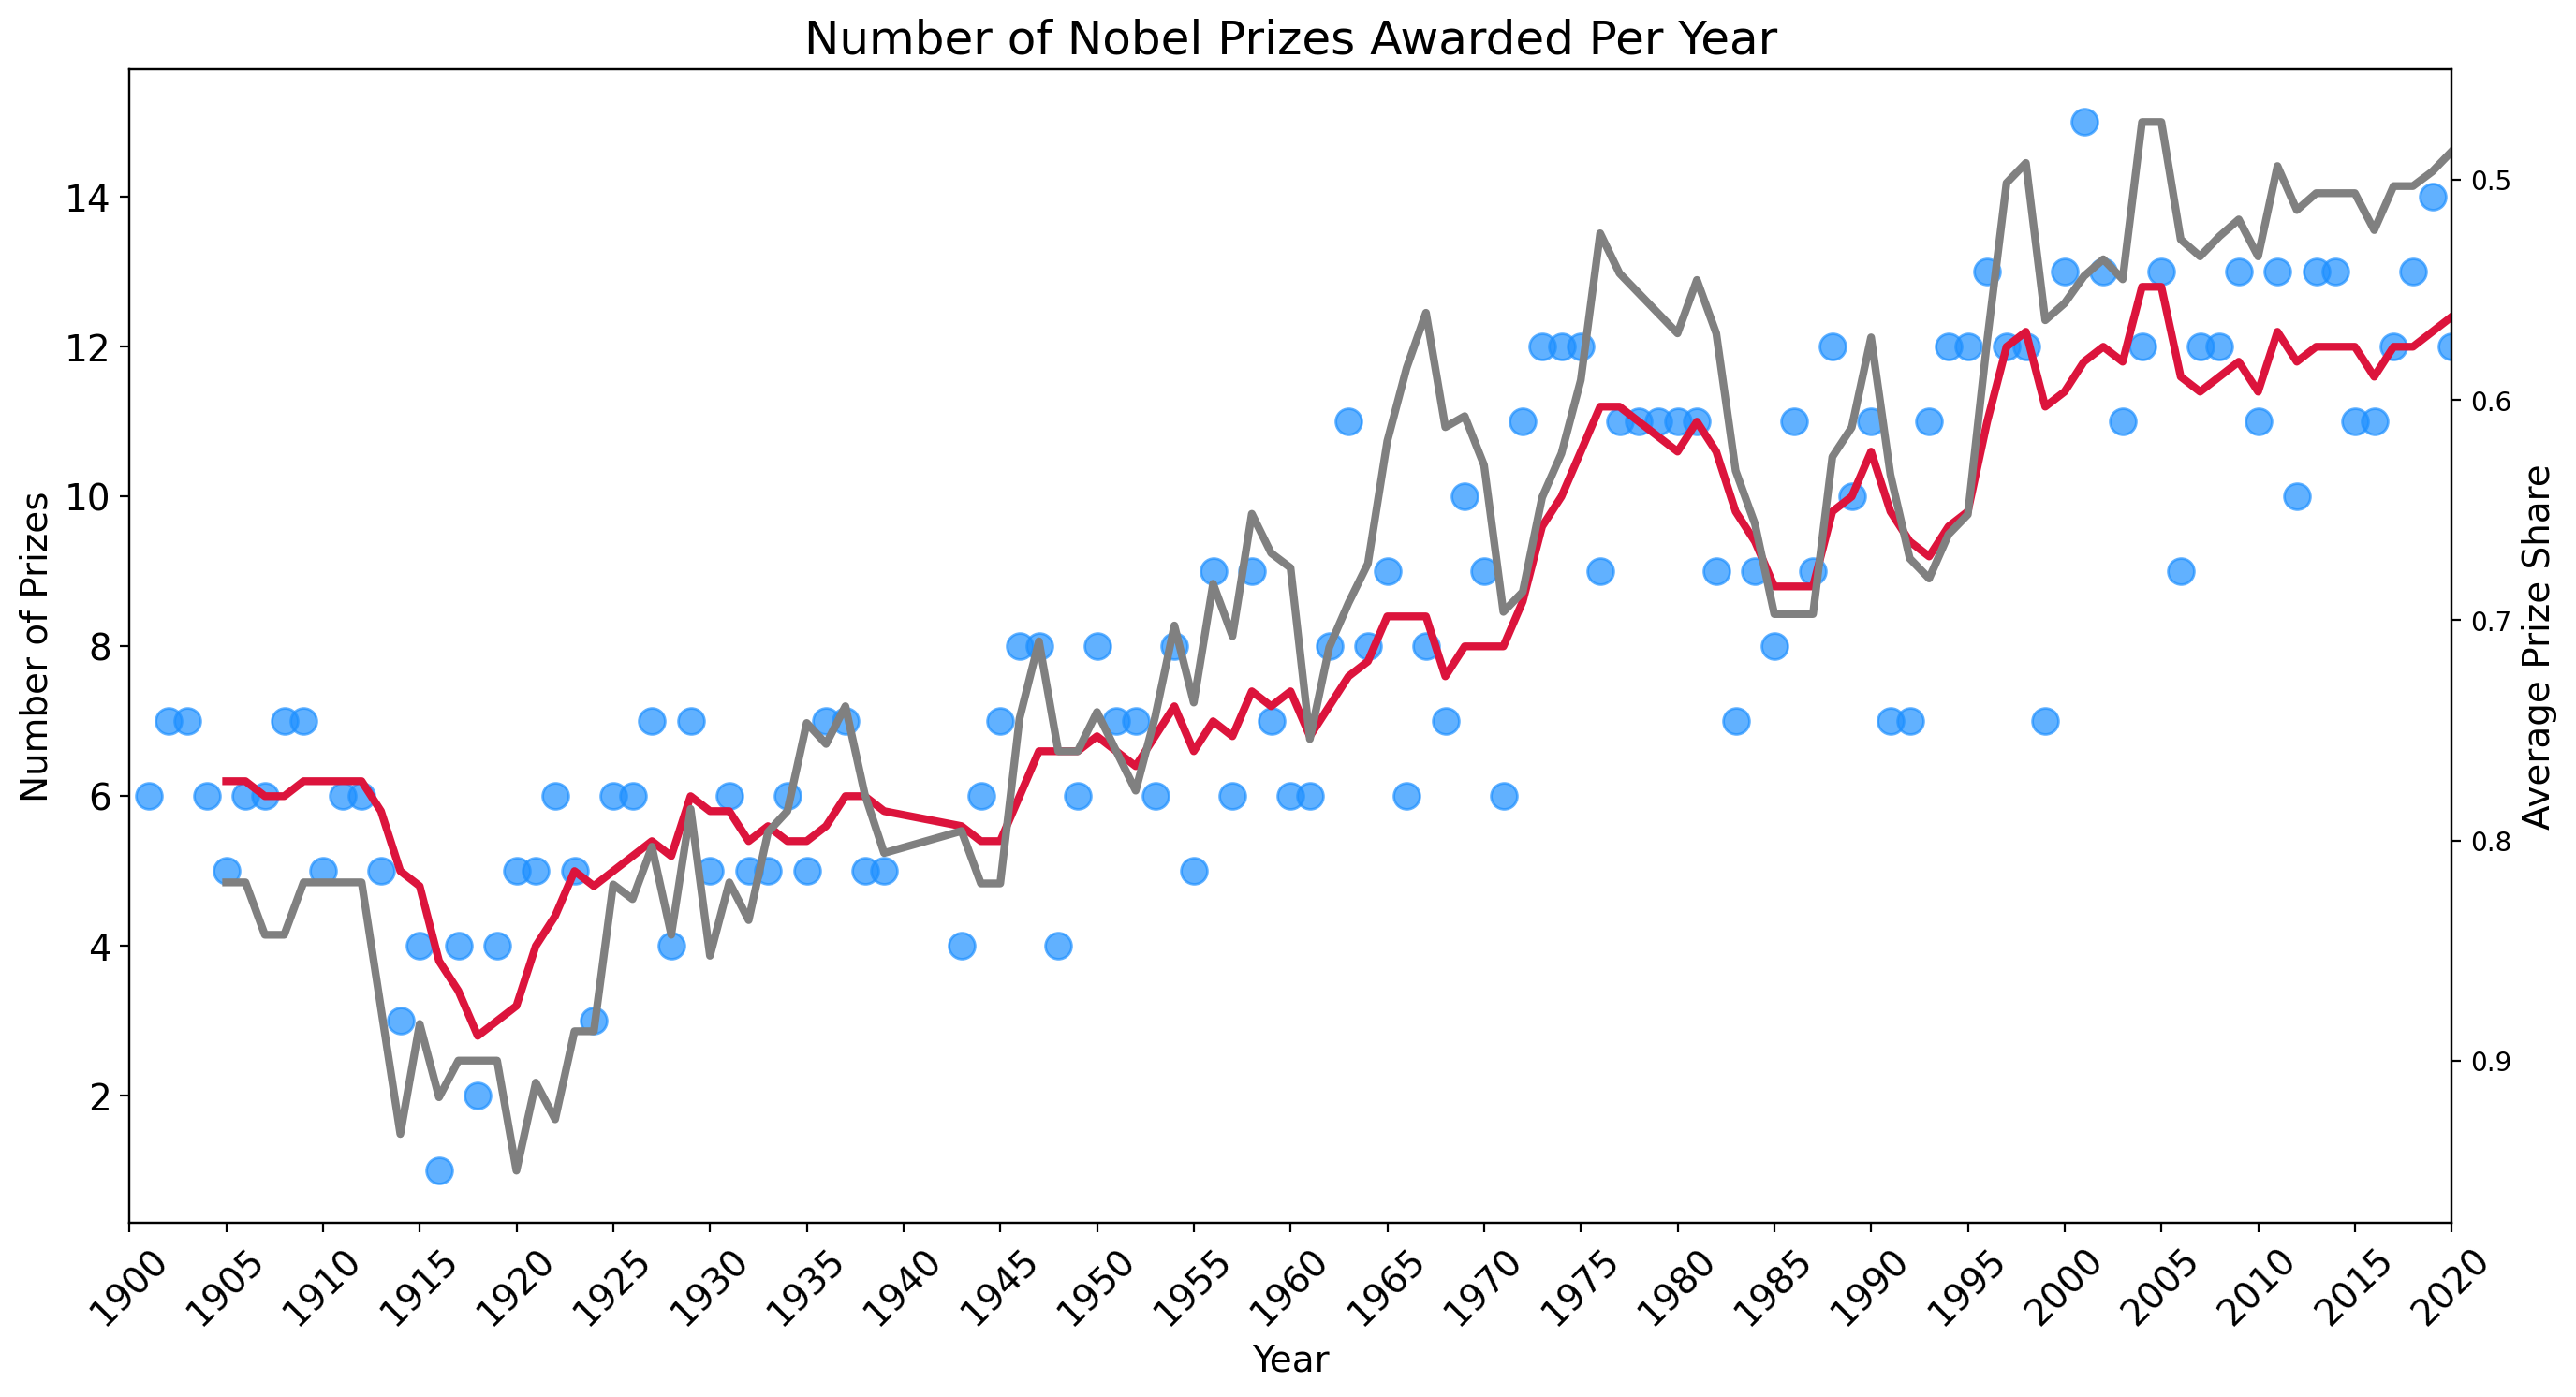

In [ ]:
moving_average_a = prize_per_year.rolling(window=5).mean()
moving_average_b = average_prize_share.rolling(window=5).mean()

plt.figure(figsize=(16,8), dpi=200)
plt.title('Number of Nobel Prizes Awarded Per Year', fontsize=18)

plt.xticks(np.arange(1900,2021,step=5),
           fontsize=14,
           rotation=45)
plt.yticks(fontsize=14)

ax1 = plt.gca() # get current axis
ax2 = plt.twinx() # create secondary axis

ax1.set_xlim(1900,2020)
# can invert axis
ax2.invert_yaxis()

ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('Number of Prizes', fontsize=14)
ax2.set_ylabel('Average Prize Share', fontsize=14)

ax1.scatter(x=prize_per_year.index,
            y=prize_per_year.values,
            color='dodgerblue',
            alpha=0.7,
            s=100)

ax1.plot(moving_average_a.index,
         moving_average_a.values,
         color='crimson',
         linewidth=3)

ax2.plot(moving_average_b.index,
         moving_average_b.values,
         color='grey',
         linewidth=3)

plt.show()



What do we see on the chart? Well, there is clearly an upward trend in the number of prizes being given out as more and more prizes are shared. Also, more prizes are being awarded from 1969 onwards because of the addition of the economics category. We also see that very few prizes were awarded during the first and second world wars. Note that instead of there being a zero entry for those years, we instead see the effect of the wards as missing blue dots.

# The Countries with the Most Nobel Prizes


* Is it best to use `birth_country`, `birth_country_current` or `organization_country`?
* What are some potential problems when using `birth_country` or any of the others? Which column is the least problematic?
* What is the ranking for the top 20 countries in terms of the number of prizes?

Looking at our DataFrame there are actually 3 different columns to choose from for creating this ranking: birth_country, birth_country_current or organization_country. However, they each have certain problems and limitations.

If you look at the entries in the birth country, you'll see that some countries no longer exist! These include the Soviet Union or Czechoslovakia for example. Hence, using birth_country_current is better, since it has the country name which controls the city where the laureate was born. Now, notice that this does not determine the laureates' nationality since some globetrotting folks gave birth to their future Nobel laureate children while abroad. Also, people's nationalities can change as they emigrate and acquire different citizenship or get married and change citizenship. What this boils down to is that we will have to be clear about the assumptions that we will make in the upcoming analysis.

In [ ]:
top_countries = df_data.groupby(['birth_country_current'], as_index=False).agg({'prize':'count'})
top_countries.sort_values('prize', inplace=True)
top20_countries = top_countries.tail(20)

top20_countries

,birth_country_current,prize
7,Belgium,9
31,Hungary,9
33,India,9
2,Australia,10
20,Denmark,12
54,Norway,12
13,China,12
51,Netherlands,18
3,Austria,18
39,Italy,19


In [ ]:
h_bar = px.bar(x=top20_countries.prize,
               y=top20_countries.birth_country_current,
               orientation='h',
               title='Top 20 Countries by Number of Prizes',
               color=top20_countries.prize,
               color_continuous_scale='Viridis')
h_bar.update_layout(xaxis_title='Number of Prizes',
                    yaxis_title='Country',
                    coloraxis_showscale=False)
h_bar.show()

# Using Map to Show the Number of Prizes Won by Country


In [ ]:
top_m = df_data.groupby(['birth_country_current','ISO'], as_index=False).agg({'prize':'count'})
top_countries_map = top_m.sort_values('prize', ascending=False)

top_countries_map

,birth_country_current,ISO,prize
74,United States of America,USA,281
73,United Kingdom,GBR,105
26,Germany,DEU,84
25,France,FRA,57
67,Sweden,SWE,29
...,...,...,...
32,Iceland,ISL,1
47,Madagascar,MDG,1
34,Indonesia,IDN,1
36,Iraq,IRQ,1


In [ ]:
world_map = px.choropleth(top_countries_map,
                          locations='ISO',
                          color='prize',
                          color_continuous_scale=px.colors.sequential.matter,
                          hover_name='birth_country_current',
                          scope='world',
                          title='Number of Nobel Prizes Won by Country',
                          labels={'prize':'Prizes'}
                         )
world_map.update_layout(coloraxis_showscale=True)
world_map.show()

# In Which Categories are the Different Countries Winning Prizes?

* In which category are Germany and Japan the weakest compared to the United States?
* In which category does Germany have more prizes than the UK?
* In which categories does France have more prizes than Germany?
* Which category makes up most of Australia's nobel prizes?
* Which category makes up half of the prizes in the Netherlands?
* Does the United States have more prizes in Economics than all of France? What about in Physics or Medicine?





In [ ]:
cat_country = df_data.groupby(['birth_country_current','category'], as_index=False).agg({'prize':'count'})
cat_country.sort_values('prize', ascending=False, inplace=True)
cat_country

,birth_country_current,category,prize
204,United States of America,Medicine,78
206,United States of America,Physics,70
201,United States of America,Chemistry,55
202,United States of America,Economics,49
198,United Kingdom,Medicine,28
...,...,...,...
97,Iraq,Peace,1
99,Ireland,Medicine,1
100,Ireland,Physics,1
102,Israel,Economics,1


In [ ]:
merged_df = pd.merge(cat_country, top20_countries, on='birth_country_current')
merged_df.columns = ['birth_country_current','category','cat_prize','total_prize']
merged_df.sort_values(by='total_prize', inplace=True)
merged_df

,birth_country_current,category,cat_prize,total_prize
109,India,Physics,1,9
108,India,Peace,1,9
88,Belgium,Peace,3,9
89,Belgium,Medicine,3,9
90,Belgium,Chemistry,1,9
...,...,...,...,...
4,United States of America,Peace,19,281
3,United States of America,Economics,49,281
2,United States of America,Chemistry,55,281
1,United States of America,Physics,70,281


In [ ]:
h_bar = px.bar(y=merged_df.birth_country_current,
               x=merged_df.cat_prize,
               orientation='h',
               title='Top 20 Countries by Number of Prizes and Category',
               color=merged_df.category,
               color_discrete_sequence=px.colors.sequential.Plasma,
               labels={'color':'Category'}
               )
h_bar.update_layout(xaxis_title='Number of Prizes',
                    yaxis_title='Country',
                    coloraxis_showscale=True)
h_bar.show()

Splitting the country bar chart by category allows us to get a very granular look at the data and answer a whole bunch of questions. For example, we see is that the US has won an incredible proportion of the prizes in the field of Economics. In comparison, Japan and Germany have won very few or no economics prize at all. Also, the US has more prizes in physics or medicine alone than all of France's prizes combined. On the chart, we also see that Germany won more prizes in physics than the UK and that France has won more prizes in peace and literature than Germany, even though Germany has been awarded a higher total number of prizes than France. We also observe that Australia has won more prizes in medecine that all other categories combined and physics category makes up half of the prices of Netherlands.

From the above chart, the question arises is when did the United States become so dominant? Was it always this way? Has the prize become more global in scope?

### Number of Prizes Won by Each Country Over Time

* When did the United States eclipse every other country in terms of the number of prizes won?
* Which country or countries were leading previously?
* Calculate the cumulative number of prizes won by each country in every year. Again, use the `birth_country_current` of the winner to calculate this.
* Create a line chart where each country is a coloured line.

In [ ]:
prize_per_year = df_data.groupby(['birth_country_current','year'], as_index=False).count()
prize_per_year = prize_per_year.sort_values('year')[['year','birth_country_current','prize']]

prize_per_year

,year,birth_country_current,prize
118,1901,France,2
346,1901,Poland,1
159,1901,Germany,1
312,1901,Netherlands,1
440,1901,Switzerland,1
...,...,...,...
31,2019,Austria,1
221,2020,Germany,1
622,2020,United States of America,7
533,2020,United Kingdom,2


In [ ]:
cumulative_prizes = prize_per_year.groupby(['birth_country_current','year']).sum().groupby(level=[0]).cumsum()
cumulative_prizes.reset_index(inplace=True)
cumulative_prizes

,birth_country_current,year,prize
0,Algeria,1957,1
1,Algeria,1997,2
2,Argentina,1936,1
3,Argentina,1947,2
4,Argentina,1980,3
...,...,...,...
622,United States of America,2020,281
623,Venezuela,1980,1
624,Vietnam,1973,1
625,Yemen,2011,1


In [ ]:
l_chart = px.line(cumulative_prizes,
                  x='year',
                  y='prize',
                  color='birth_country_current',
                  title='Prizes by Country Overtime',
                  hover_name='birth_country_current'
                  )
l_chart.update_layout(yaxis_title='Number of Prizes',
                      xaxis_title='Year'
                      )
l_chart.show()

What we see is that the United States really started to take off after the Second World War which decimated Europe. Prior to that, the Nobel prize was pretty much a European affair. Very few laureates were chosen from other parts of the world. This has changed dramatically in the last 40 years or so. There are many more countries represented today than in the early days. Interestingly we also see that the UK and Germany traded places in the 70s and 90s on the total number of prizes won. Sweden being 5th place pretty consistently over many decades is quite interesting too. Perhaps this reflects a little bit of home bias?

All this analysis of different countries makes me curious about where the actual research is happening. Where are the cities and organisations located where people actually make discoveries?

# What are the Top Research Organisations?

* Which organisations make up the top 20?
* How many Nobel prize winners are affiliated with the University of Chicago and Harvard University?

In [ ]:
prize_per_organisation = df_data.organization_name.value_counts()[:20]
prize_per_organisation.sort_values(ascending=True, inplace=True)
prize_per_organisation

,count
organization_name,
Sorbonne University,7
Harvard Medical School,7
Institut Pasteur,7
London University,7
Bell Laboratories,8
Cornell University,8
Yale University,9
MRC Laboratory of Molecular Biology,10
University of Oxford,12


In [ ]:
hx_bar = px.bar(x=prize_per_organisation.values,
                y=prize_per_organisation.index,
                orientation='h',
                color=prize_per_organisation.values,
                color_continuous_scale='Plasma',
                title='Top 20 Research Institutions by Number of Prizes',
                hover_name=prize_per_organisation.index
                )

hx_bar.update_layout(xaxis_title= 'Number of Prizes',
                     yaxis_title= 'Institution',
                     coloraxis_showscale=False)

hx_bar.show()

# Which Cities Make the Most Discoveries?

Each research organisation is located in a particular city. Are some cities hot spots for scientific discoveries? Where do major discoveries tend to take place?

In [ ]:
top20_cities = df_data.organization_city.value_counts()[:20]
top20_cities.sort_values(ascending=True, inplace=True)
top20_cities

,count
organization_city,
"Ithaca, NY",8
"Los Angeles, CA",8
"New Haven, CT",9
Heidelberg,9
"Boston, MA",9
Munich,9
Moscow,10
Stockholm,10
Berlin,12


In [ ]:
c_bar = px.bar( x=top20_cities.values,
                y=top20_cities.index,
                orientation='h',
                color=top20_cities.values,
                color_continuous_scale='Plasma',
                title='Which Cities Do the Most Research?'
                )

c_bar.update_layout(xaxis_title= 'Number of Prizes',
                     yaxis_title= 'City',
                     coloraxis_showscale=False)

c_bar.show()

# Where are Nobel Laureates Born? Chart the Laureate Birth Cities



In [ ]:
top20_birth_cities = df_data.birth_city.value_counts()[:20]
top20_birth_cities.sort_values(ascending=True, inplace=True)
top20_birth_cities

,count
birth_city,
"Ann Arbor, MI",3
Montreal,4
Cairo,4
"Pittsburgh, PA",4
Prague,5
Frankfurt-on-the-Main,5
Hamburg,6
Stockholm,6
Moscow,7


In [ ]:
b_bar = px.bar( x=top20_birth_cities.values,
                y=top20_birth_cities.index,
                orientation='h',
                color=top20_birth_cities.values,
                color_continuous_scale='Plasma',
                title='Where were the Nobel Laureates Born?'
                )

b_bar.update_layout(xaxis_title= 'Number of Prizes',
                     yaxis_title= 'Birth City',
                     coloraxis_showscale=False)

b_bar.show()

A higher population definitely means that there's a higher chance of a Nobel laureate to be born there. New York, Paris, and London are all very populous. However, Vienna and Budapest are not and still produced many prize winners. That said, much of the ground-breaking research does not take place in big population centres, so the list of birth cities is quite different from the list above. Cambridge Massachusets, Stanford, Berkely and Cambridge (UK) are all the places where many discoveries are made, but they are not the birthplaces of laureates.

#Sunburst Chart representing Organisation Country, City, and Name



In [ ]:
country_city_org = df_data.groupby(by=['organization_country','organization_city','organization_name'], as_index=False).agg({'prize':'count'})
country_city_org.sort_values('prize', ascending=False, inplace=True)
country_city_org.head(5)

,organization_country,organization_city,organization_name,prize
205,United States of America,"Cambridge, MA",Harvard University,29
280,United States of America,"Stanford, CA",Stanford University,23
206,United States of America,"Cambridge, MA",Massachusetts Institute of Technology (MIT),21
209,United States of America,"Chicago, IL",University of Chicago,20
195,United States of America,"Berkeley, CA",University of California,19


In [ ]:
burst = px.sunburst(country_city_org,
                  path=['organization_country','organization_city','organization_name'],
                  values='prize',
                  title='Nobel Prize Winners by Country, City, and Organisation'
                  )
burst.update_layout(xaxis_title='Number of Prizes',
                    yaxis_title='City')

burst.show()

France is a great example of concentration. Practically all the organisations affiliated with Nobel prize winners are in Paris. In contrast, scientific discoveries are much more spread out across Germany. Meanwhile, the UK is dominated by Cambridge and London.

# Patterns in the Laureate Age at the Time of the Award




* How Old were the Laureates when they won the prize?
* What are the names of the youngest and oldest Nobel laureate?
* What did they win the prize for?
* What is the average age of a winner?
* 75% of laureates are younger than what age when they receive the prize?


In [ ]:
df_data['winning_age'] = df_data.year - df_data.birth_date.dt.year
df_data.head(1)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,winning_age
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,1.00,49.00


In [ ]:
print(f'The oldest Nobel Laureate was:')
display(df_data.nlargest(n=1,columns='winning_age'))
print(f'\nThe youngest Nobel Laureate was:')
display(df_data.nsmallest(n=1,columns='winning_age'))

The oldest Nobel Laureate was:


,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,winning_age
937,2019,Chemistry,The Nobel Prize in Chemistry 2019,“for the development of lithium-ion batteries”,1/3,Individual,John Goodenough,1922-07-25,Jena,Germany,Germany,Male,University of Texas,Austin TX,United States of America,DEU,0.33,97.00



The youngest Nobel Laureate was:


,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,winning_age
885,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,Individual,Malala Yousafzai,1997-07-12,Mingora,Pakistan,Pakistan,Female,NaN,NaN,NaN,PAK,0.50,17.00


John Goodenough was 97 years old when he got the Nobel prize!!! Holy moly. Interestingly John was born to American parents while they were in Germany. This is one example where our analysis of countries counts an extra "German" prize even though he is an American citizen. Too bad we don't have a nationality column in our dataset! Nonetheless, this goes to show it is never too late to win a Nobel prize.

In [ ]:
df_data.winning_age.describe()

,winning_age
count,934.00
mean,59.95
std,12.62
min,17.00
25%,51.00
50%,60.00
75%,69.00
max,97.00


Therefore, the average age of winning a Nobel Prize is nearly 60 years. Also, 75% of laureates are younger than age 69 when they receive the prize.

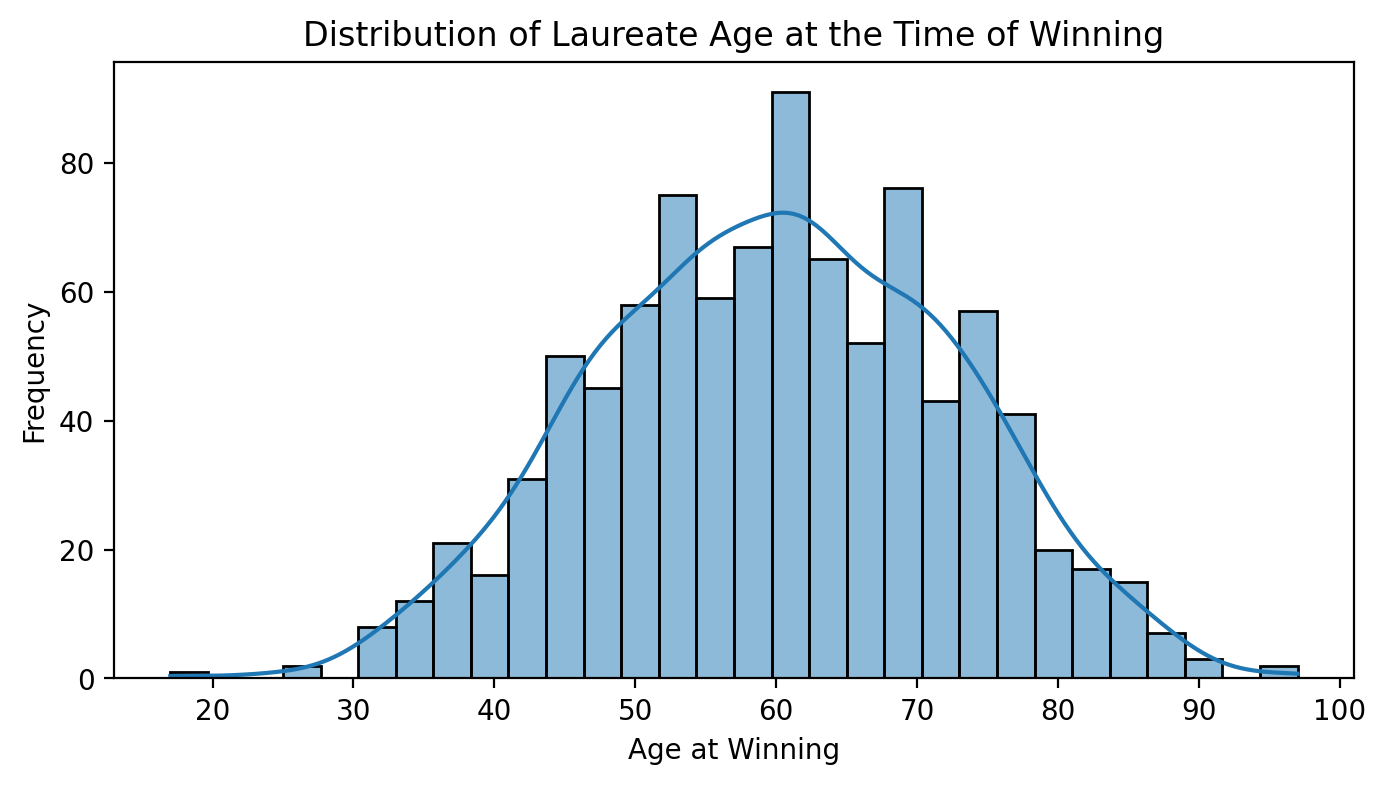

In [ ]:
plt.figure(figsize=(8,4), dpi=200)

sns.histplot(df_data,
             x='winning_age',
             bins=30,
             kde=True)

plt.title('Distribution of Laureate Age at the Time of Winning')
plt.xlabel('Age at Winning')
plt.ylabel('Frequency')

plt.show()

The histogram provides a visual representation of the ages at which Nobel laureates win their prizes. Most winners are clustered around the age of 60, with fewer laureates winning at younger or older ages.

### Age at Time of Award throughout History

* Are Nobel laureates being nominated later in life than before? Have the ages of laureates at the time of the award increased or decreased over time?
* How old were Nobel laureates in the years 1900-1940 when they were awarded the prize?
* What age would it predict for a Nobel laureate in 2020?


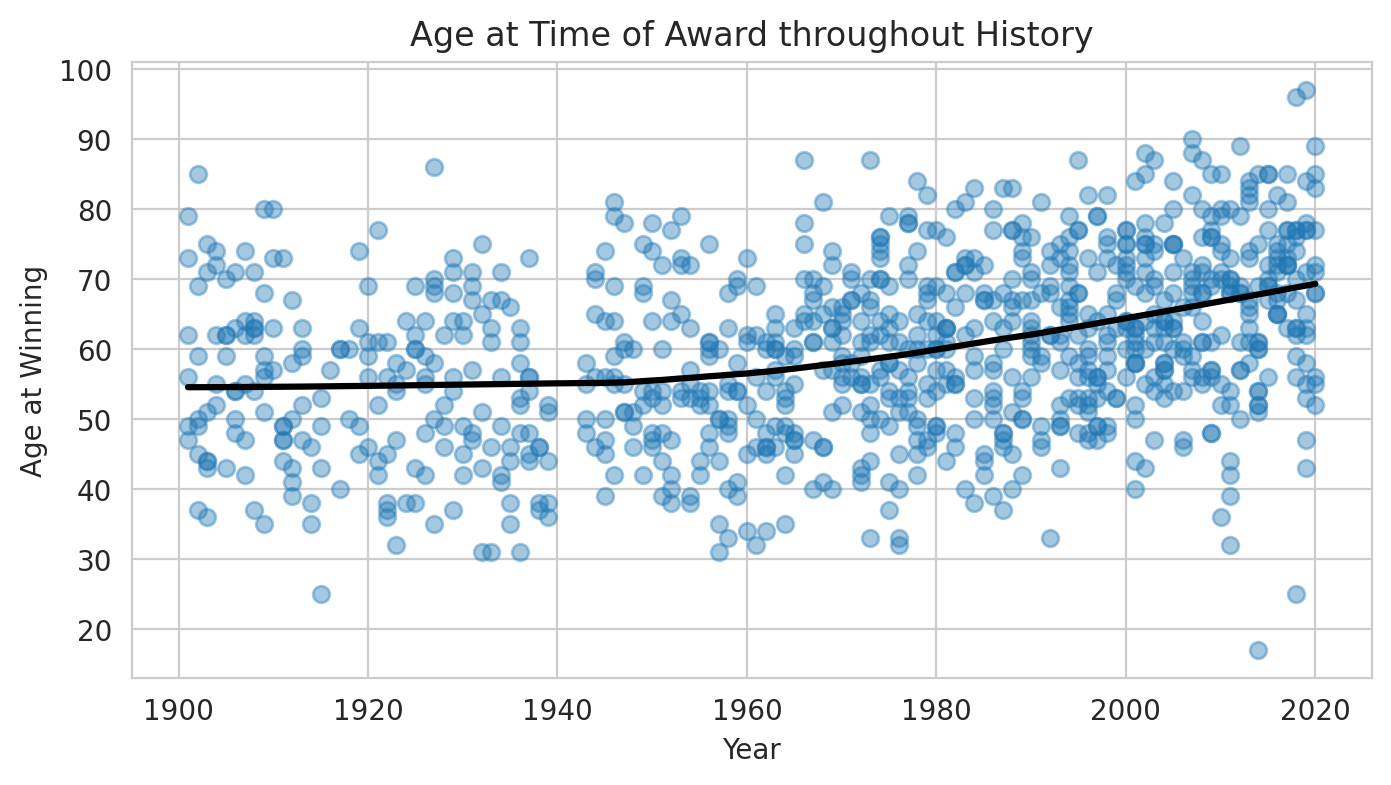

In [ ]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style('whitegrid'):
  sns.regplot(data=df_data,
            x='year',
            y='winning_age',
            lowess=True,
            scatter_kws={'alpha':0.4},
            line_kws={'color':'black'}
            )

plt.title('Age at Time of Award throughout History')
plt.xlabel('Year')
plt.ylabel('Age at Winning')
plt.show()

The plot above clearly shows how the Nobel laureates are getting their award later and later in life. From 1900 to around 1940, the laureates were around 55 years old, but these days they are closer to 70 years old when they get their award! The other thing that we see in the chart is that in the last 10 years the spread has increased. We've had more very young and very old winners. In 1950s/60s winners were between 30 and 80 years old. Lately, that range has widened.

### Winning Age Across the Nobel Prize Categories

How does the age of laureates vary by category?
* In which prize category are the average winners the oldest?
* In which prize category are the average winners the youngest?
* What are the winning age trends in each category?
* Which category has the age trending up and which category has the age trending down?


In [ ]:
age_vs_category = df_data.groupby('category', as_index=False).agg({'winning_age':'mean'})
age_vs_category.sort_values('winning_age', ascending=False, inplace=True)
age_vs_category

,category,winning_age
1,Economics,66.97
2,Literature,64.79
4,Peace,60.90
0,Chemistry,58.82
3,Medicine,58.58
5,Physics,56.44


<ipython-input-107-d441badc9eae>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




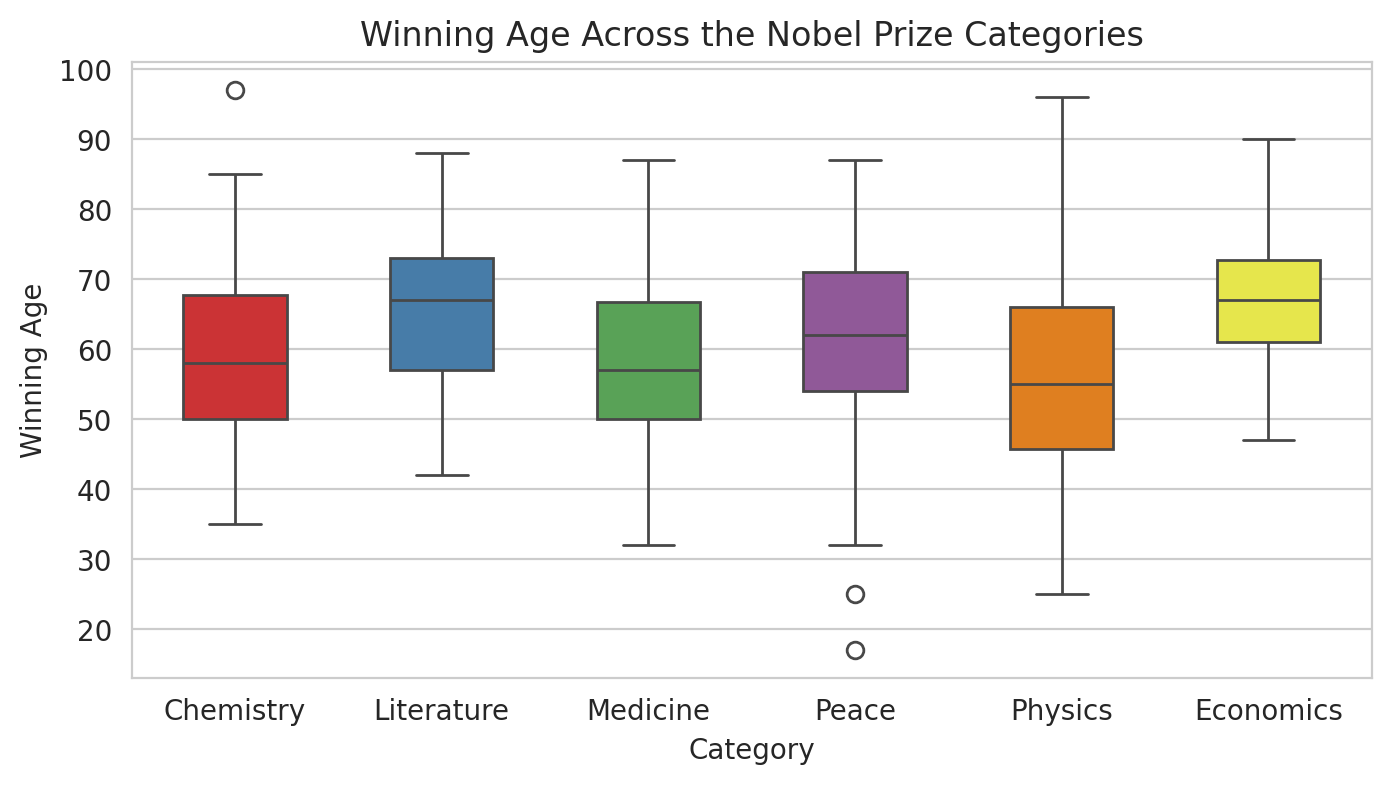

In [ ]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style('whitegrid'):
  sns.boxplot(data=df_data,
              x='category',
              y='winning_age',
              palette='Set1',
              linewidth=1,
              width=0.5
              )

plt.title('Winning Age Across the Nobel Prize Categories')
plt.xlabel('Category')
plt.ylabel('Winning Age')
plt.show()

The box plot shows us the mean, the quartiles, the maximum and the minimum values. It raises an interesting question: "Are peace prize winners really older than physics laureates?".

<Figure size 1600x800 with 0 Axes>

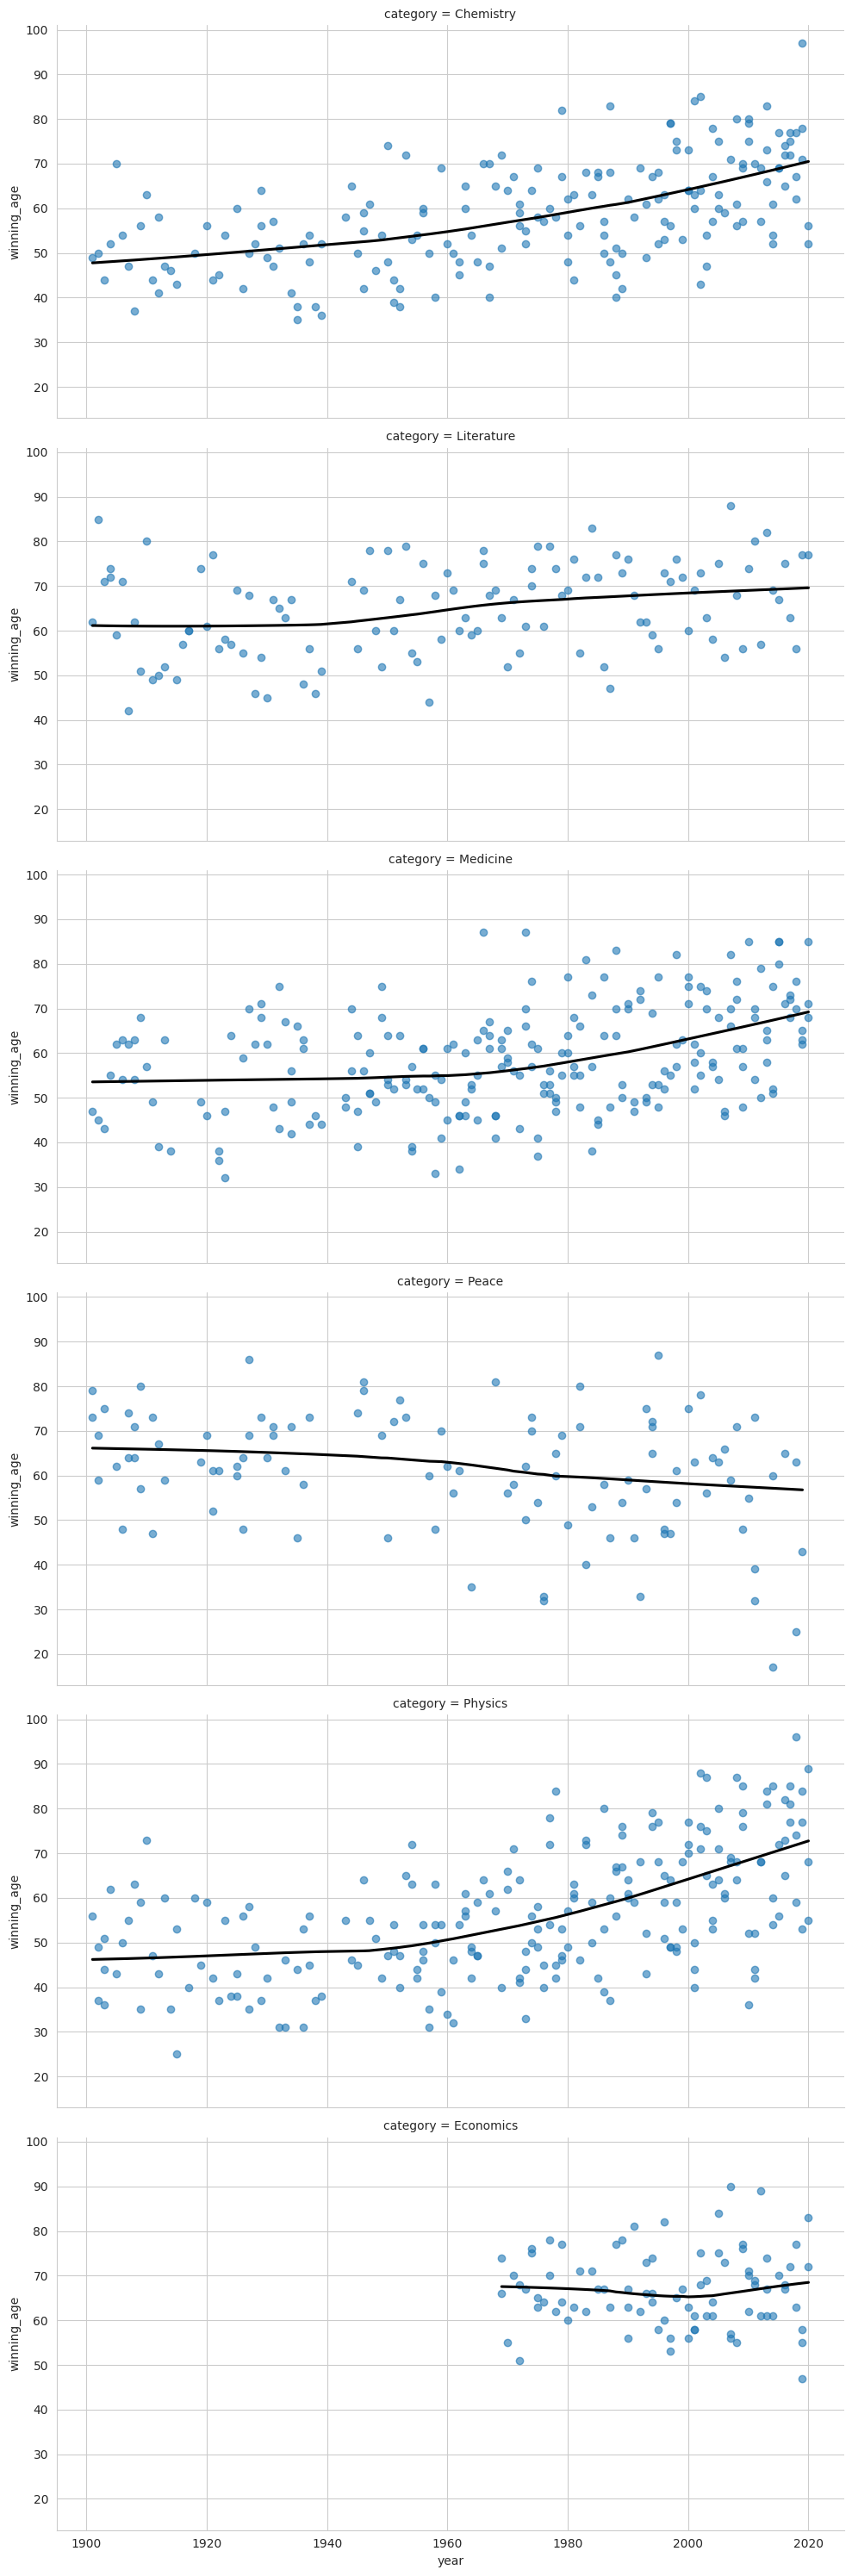

In [ ]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style('whitegrid'):
  sns.lmplot(data=df_data,
              x='year',
              y='winning_age',
              row='category',
              lowess=True,
              aspect=2,
              scatter_kws={'alpha':0.6},
              line_kws={'color':'black'}
              )

plt.show()

Is this `.lmplot()` telling a different story from the `.boxplot()`?

We see that winners in physics, chemistry, and medicine have gotten older over time. The ageing trend is strongest for physics. The average age used to be below 50, but now it's over 70. Economics, the newest category, is much more stable in comparison. The peace prize shows the opposite trend where winners are getting younger! As such, our scatter plots showing the best fit lines over time and our box plot of the entire dataset can tell very different stories!

Combining all these charts into the same chart, we get:

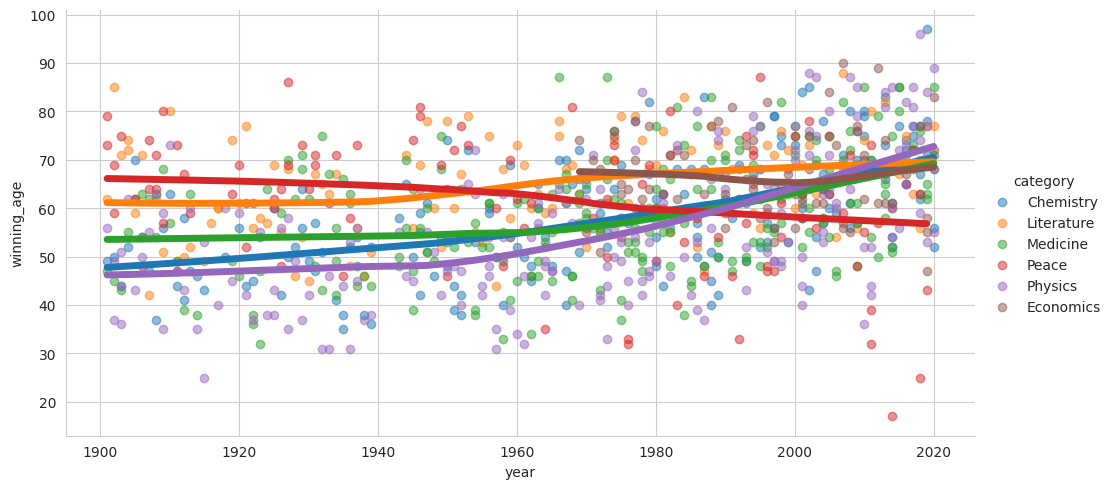

In [ ]:
with sns.axes_style("whitegrid"):
    sns.lmplot(data=df_data,
               x='year',
               y='winning_age',
               hue='category',
               lowess=True,
               aspect=2,
               scatter_kws={'alpha': 0.5},
               line_kws={'linewidth': 5})

plt.show()